In [192]:
import pandas as pd

In [193]:
pred_PLS_SM = pd.read_csv("./data/data/PLS_SM/tar_pred.csv")
pred_PLS_SM.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

pred_ICA = pd.read_csv("./data/data/jade/ica/tar_pred.csv")
pred_ICA["Sample Name"] = pred_ICA["target"]
pred_ICA.drop(columns=["target"], axis=1, inplace=True)

In [194]:
pred_ICA.columns

Index(['ID', 'SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MgO', 'CaO', 'Na2O', 'K2O',
       'Sample Name'],
      dtype='object')

In [195]:
pred_ICA.head()

,ID,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name
0,jsc1399_2013_09_11_151245_ccs,54.474514,0.915070,20.829506,13.384058,6.189111,8.389946,4.604968,1.085528,jsc1399
1,r65_2013_11_05_151321_ccs,59.169137,0.057594,12.543319,4.811779,6.537739,5.210740,2.962094,2.150490,r65
2,vzo106_2013_09_03_181628_ccs,66.385505,0.698434,12.804766,8.597515,-0.085340,1.824899,2.953498,1.731704,vzo106
3,201424_2013_11_06_155255_ccs,64.299683,0.886038,14.750741,4.977112,4.747535,2.304864,2.753124,2.874335,201424
4,jsc1424_2013_09_16_145015_ccs,57.715829,1.176242,13.347413,12.256024,3.557050,5.910352,1.648106,0.378352,jsc1424


In [196]:
ids_to_keep = pred_ICA["ID"]
filtered_pred_PLS_SM = pred_PLS_SM[pred_PLS_SM['ID'].isin(ids_to_keep)]

In [197]:
filtered_pred_PLS_SM.set_index("ID", inplace=True)
pred_ICA.set_index("ID", inplace=True)

In [198]:
aligned_pred_PLS_SM, aligned_pred_ICA = filtered_pred_PLS_SM.align(pred_ICA, join="inner", axis=0)

In [199]:
aligned_pred_PLS_SM

,Sample Name,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O
ID,,,,,,,,,
jsc1426_2013_09_16_151528_ccs,jsc1426,42.199475,0.179197,2.301557,43.355379,0.527079,0.839088,0.503439,0.076735
bk2_2013_08_06_184259_ccs,bk2,60.489308,0.755301,15.720130,4.656748,2.072465,4.417494,3.980115,3.591427
jsc1379_2013_09_10_142041_ccs,jsc1379,49.168257,0.786676,18.942437,8.232171,4.306825,9.502895,3.749899,0.738520
gbw07108_2013_08_07_145651_ccs,gbw07108,21.806462,0.270951,5.728554,3.124891,3.412307,32.523570,0.662775,1.007616
jsc1456_2013_09_18_160559_ccs,jsc1456,49.913846,2.535613,16.784011,10.266866,4.271121,7.532339,4.505630,1.315754
...,...,...,...,...,...,...,...,...,...
gbw07105_2013_08_07_142727_ccs,gbw07105,45.254980,2.218118,14.434764,11.289847,7.481151,8.577607,3.721762,1.595640
sarm51_2013_08_29_145612_ccs,sarm51,44.691284,0.372667,9.498774,13.988716,0.850564,2.163324,0.478211,0.597297
s4_2013_11_05_155948_ccs,s4,64.085118,0.781323,18.716993,5.541663,2.257753,0.484870,0.683235,3.813765


In [200]:
from lib.reproduction import weighted_sum_oxide_percentages, major_oxides

merged_df = pd.merge(aligned_pred_ICA, aligned_pred_PLS_SM, on='Sample Name', suffixes=('_ICA', '_PLS_SM'))
moc_predictions = pd.DataFrame()

for oxide in major_oxides:
    w_ica = weighted_sum_oxide_percentages[oxide]['ICA'] / 100
    w_pls_sm = weighted_sum_oxide_percentages[oxide]['PLS1-SM'] / 100
    moc_predictions[oxide] = merged_df[oxide + '_ICA'] * w_ica + merged_df[oxide + '_PLS_SM'] * w_pls_sm

moc_predictions['Sample Name'] = merged_df['Sample Name']
moc_predictions['ID'] = aligned_pred_ICA.index

In [201]:
moc_predictions

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name,ID
0,50.669656,-0.213095,4.006029,36.479450,-0.523198,2.476399,2.586317,1.332727,jsc1426,jsc1426_2013_09_16_151528_ccs
1,61.719850,1.424474,18.100537,4.843208,2.654425,4.188483,5.874842,5.335954,bk2,bk2_2013_08_06_184259_ccs
2,51.991151,0.920283,18.941338,8.723582,4.824765,8.139136,4.617944,0.739015,jsc1379,jsc1379_2013_09_10_142041_ccs
3,20.243217,0.058781,6.246072,3.998746,6.495358,30.390241,2.348710,0.119415,gbw07108,gbw07108_2013_08_07_145651_ccs
4,48.918742,2.372368,18.184279,10.413856,4.932949,6.330174,3.170691,1.258442,jsc1456,jsc1456_2013_09_18_160559_ccs
...,...,...,...,...,...,...,...,...,...,...
66,43.332135,2.146669,15.911297,11.837837,8.576537,7.986739,3.666522,1.159425,gbw07105,gbw07105_2013_08_07_142727_ccs
67,50.023284,0.171390,10.181592,13.059557,-3.841927,5.683010,3.162840,0.015959,sarm51,sarm51_2013_08_29_145612_ccs
68,63.774629,1.083199,18.342840,6.299579,3.414610,0.173296,1.716486,3.743914,s4,s4_2013_11_05_155948_ccs
69,77.031251,0.168889,13.798088,3.218346,1.065605,-0.086241,1.483272,3.714675,gl7mt,gl7mt_2013_10_23_144551_ccs


In [202]:
from lib.data_handling import CompositionData

cd = CompositionData("data/data/calib/ccam_calibration_compositions.csv")

In [203]:
def merge_with_actual_data(moc_predictions):
    merged_data = pd.DataFrame()

    for index, row in moc_predictions.iterrows():
        actual_data = cd.get_composition_for_sample(row['Sample Name'])

        if not actual_data.empty:
            for oxide in major_oxides:
                merged_data.at[index, oxide + '_pred'] = row[oxide]
                merged_data.at[index, oxide + '_actual'] = actual_data[oxide].values[0]
            merged_data.at[index, 'Sample Name'] = row['Sample Name']

    return merged_data

In [204]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(merged_data):
    rmse_values = {}
    for oxide in major_oxides:
        y_actual = merged_data[oxide + '_actual']
        y_pred = merged_data[oxide + '_pred']
        rmse = mean_squared_error(y_actual, y_pred, squared=False)
        rmse_values[oxide] = rmse
    return rmse_values

# Usage example
merged_moc_actual_df = merge_with_actual_data(moc_predictions)
moc_rmse_values = calculate_rmse(merged_moc_actual_df)

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

In [205]:
SiO2_eval_df = pd.merge(merged_df[["SiO2_ICA", "SiO2_PLS_SM", "Sample Name"]], 
                    merged_moc_actual_df[["SiO2_actual", "SiO2_pred", "Sample Name"]], 
                    on="Sample Name")

SiO2_eval_df = SiO2_eval_df[0:5]
SiO2_eval_df

,SiO2_ICA,SiO2_PLS_SM,Sample Name,SiO2_actual,SiO2_pred
0,59.139837,42.199475,jsc1426,19.3,50.669656
1,62.950392,60.489308,bk2,58.83,61.719850
2,54.814046,49.168257,jsc1379,48.93,51.991151
3,18.679971,21.806462,gbw07108,15.6,20.243217
4,47.923638,49.913846,jsc1456,49.31,48.918742


/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

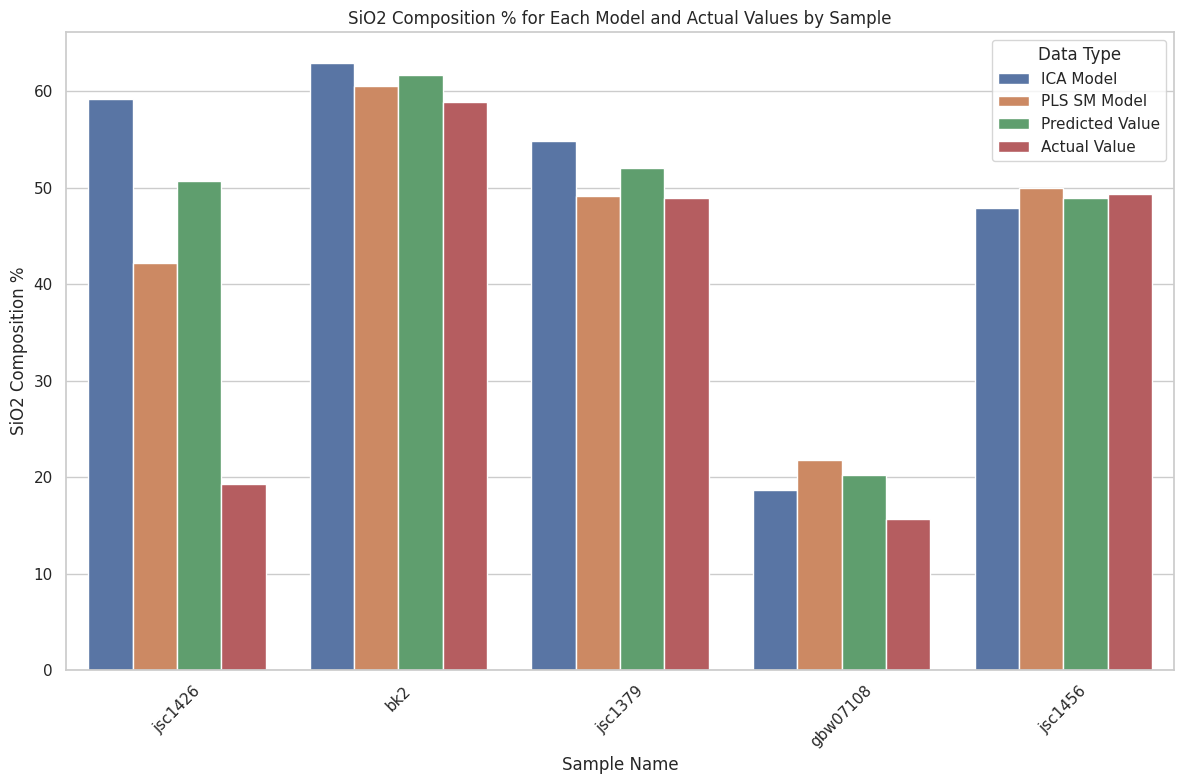

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a figure for the plot
plt.figure(figsize=(12, 8))

# Creating aliases for the value_vars
aliases = {
    'SiO2_ICA': 'ICA Model',
    'SiO2_PLS_SM': 'PLS SM Model',
    'SiO2_pred': 'Predicted Value',
    'SiO2_actual': 'Actual Value'
}

# Merging the data for actual and predicted values for the plot
melted_data = pd.melt(SiO2_eval_df, id_vars='Sample Name', value_vars=list(aliases.keys()))

# Renaming the columns based on aliases
melted_data = melted_data.rename(columns={'variable': 'Model/Value', 'value': 'SiO2 Composition %'})
melted_data['Model/Value'] = melted_data['Model/Value'].map(aliases)

# Creating the grouped bar chart
sns.barplot(x='Sample Name', y='SiO2 Composition %', hue='Model/Value', data=melted_data)

# Adding labels and title
plt.xlabel('Sample Name')
plt.ylabel('SiO2 Composition %')
plt.title('SiO2 Composition % for Each Model and Actual Values by Sample')
plt.xticks(rotation=45)
plt.legend(title='Data Type')

plt.gca().invert_yaxis()

# Displaying the plot
plt.tight_layout()
plt.show()

In [207]:
merged_moc_actual_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
0,50.669656,19.3,-0.213095,0.08,4.006029,1.49,36.479450,65.85,-0.523198,0.77,2.476399,0.77,2.586317,0.45,1.332727,0.16,jsc1426
1,61.719850,58.83,1.424474,1.94,18.100537,14.77,4.843208,7.90,2.654425,2.82,4.188483,4.64,5.874842,3.35,5.335954,3.99,bk2
2,51.991151,48.93,0.920283,0.57,18.941338,22.66,8.723582,7.67,4.824765,4.34,8.139136,9.80,4.617944,3.13,0.739015,0.45,jsc1379
3,20.243217,15.6,0.058781,0.33,6.246072,5.03,3.998746,2.27,6.495358,5.19,30.390241,35.67,2.348710,0.08,0.119415,0.78,gbw07108
4,48.918742,49.31,2.372368,2.72,18.184279,16.46,10.413856,10.93,4.932949,3.93,6.330174,6.75,3.170691,4.58,1.258442,1.82,jsc1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,43.332135,44.64,2.146669,2.37,15.911297,13.83,11.837837,12.06,8.576537,7.77,7.986739,8.81,3.666522,3.38,1.159425,2.32,gbw07105
67,50.023284,33.81,0.171390,0.82,10.181592,11.87,13.059557,16.52,-3.841927,0.92,5.683010,0.86,3.162840,0.07,0.015959,0.33,sarm51
68,63.774629,67.4,1.083199,0.9,18.342840,16.30,6.299579,5.14,3.414610,1.81,0.173296,0.21,1.716486,0.81,3.743914,3.4,s4
69,77.031251,77.54,0.168889,0.33,13.798088,11.17,3.218346,2.54,1.065605,1.08,-0.086241,0.07,1.483272,2.33,3.714675,2.39,gl7mt


In [208]:
moc_rmse_values

{'SiO2': 7.287067897121981,
 'TiO2': 0.4874777972252226,
 'Al2O3': 2.385852194695269,
 'FeOT': 5.21081836113284,
 'MgO': 1.6725492624629033,
 'CaO': 1.8070839035534292,
 'Na2O': 1.0980244861291146,
 'K2O': 1.0871666973098841}

In [209]:
ICA_actual_merged_df = merge_with_actual_data(aligned_pred_ICA)
ICA_rmses = calculate_rmse(ICA_actual_merged_df)

PLS_SM_actual_merged_df = merge_with_actual_data(aligned_pred_PLS_SM)
PLS_SM_rmses = calculate_rmse(PLS_SM_actual_merged_df)

ICA_rmses

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

{'SiO2': 10.675945494877233,
 'TiO2': 0.630111277136453,
 'Al2O3': 5.548546427605581,
 'FeOT': 8.299246038856959,
 'MgO': 2.9022778097822357,
 'CaO': 3.521759082875863,
 'Na2O': 1.720635345835822,
 'K2O': 1.367247198773664}

In [210]:
PLS_SM_actual_merged_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
jsc1426_2013_09_16_151528_ccs,42.199475,19.3,0.179197,0.08,2.301557,1.49,43.355379,65.85,0.527079,0.77,0.839088,0.77,0.503439,0.45,0.076735,0.16,jsc1426
bk2_2013_08_06_184259_ccs,60.489308,58.83,0.755301,1.94,15.720130,14.77,4.656748,7.90,2.072465,2.82,4.417494,4.64,3.980115,3.35,3.591427,3.99,bk2
jsc1379_2013_09_10_142041_ccs,49.168257,48.93,0.786676,0.57,18.942437,22.66,8.232171,7.67,4.306825,4.34,9.502895,9.80,3.749899,3.13,0.738520,0.45,jsc1379
gbw07108_2013_08_07_145651_ccs,21.806462,15.6,0.270951,0.33,5.728554,5.03,3.124891,2.27,3.412307,5.19,32.523570,35.67,0.662775,0.08,1.007616,0.78,gbw07108
jsc1456_2013_09_18_160559_ccs,49.913846,49.31,2.535613,2.72,16.784011,16.46,10.266866,10.93,4.271121,3.93,7.532339,6.75,4.505630,4.58,1.315754,1.82,jsc1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gbw07105_2013_08_07_142727_ccs,45.254980,44.64,2.218118,2.37,14.434764,13.83,11.289847,12.06,7.481151,7.77,8.577607,8.81,3.721762,3.38,1.595640,2.32,gbw07105
sarm51_2013_08_29_145612_ccs,44.691284,33.81,0.372667,0.82,9.498774,11.87,13.988716,16.52,0.850564,0.92,2.163324,0.86,0.478211,0.07,0.597297,0.33,sarm51
s4_2013_11_05_155948_ccs,64.085118,67.4,0.781323,0.9,18.716993,16.30,5.541663,5.14,2.257753,1.81,0.484870,0.21,0.683235,0.81,3.813765,3.4,s4
gl7mt_2013_10_23_144551_ccs,78.047873,77.54,0.370392,0.33,12.082005,11.17,3.616078,2.54,1.721568,1.08,-0.382714,0.07,2.283547,2.33,2.182839,2.39,gl7mt


In [211]:
PLS_SM_rmses

{'SiO2': 5.805351498994476,
 'TiO2': 0.4690051816126014,
 'Al2O3': 1.9363201494236817,
 'FeOT': 4.3481481215471876,
 'MgO': 1.1692590653488157,
 'CaO': 1.4347224209022647,
 'Na2O': 0.6649369478235511,
 'K2O': 0.7217516851245152}

In [212]:
RMSEs_df = pd.DataFrame([ICA_rmses, PLS_SM_rmses, moc_rmse_values], index=["ICA (replica)", "PLS_SM (replica)", "MOC (replica)"])

In [213]:
RMSEs_df.T

,ICA (replica),PLS_SM (replica),MOC (replica)
SiO2,10.675945,5.805351,7.287068
TiO2,0.630111,0.469005,0.487478
Al2O3,5.548546,1.936320,2.385852
FeOT,8.299246,4.348148,5.210818
MgO,2.902278,1.169259,1.672549
CaO,3.521759,1.434722,1.807084
Na2O,1.720635,0.664937,1.098024
K2O,1.367247,0.721752,1.087167


In [214]:
MOC_model_rmses = {
    'SiO2': 5.83,
    'TiO2': 1.10,
    'Al2O3': 3.18,
    'FeOT': 2.90,
    'MgO': 2.30,
    'CaO': 1.14,
    'Na2O': 1.34,
    'K2O': 1.49
 }

ICA_original_rmses = {
    'SiO2': 8.31,
    'TiO2': 1.44,
    'Al2O3': 4.77,
    'FeOT': 5.17,
    'MgO': 4.08,
    'CaO': 3.07,
    'Na2O': 2.29,
    'K2O': 0.98
 }

PLS_SM_original_rmses = {
    'SiO2': 4.33,
    'TiO2': 0.94,
    'Al2O3': 2.85,
    'FeOT': 2.01,
    'MgO': 1.06,
    'CaO': 2.65,
    'Na2O': 0.62,
    'K2O': 0.72
 }

In [215]:
R_df = RMSEs_df.T
R_df['MOC (original)'] = MOC_model_rmses.values()
R_df['ICA (original)'] = ICA_original_rmses.values()
R_df['PLS_SM (original)'] = PLS_SM_original_rmses.values()

In [216]:
R_df
# R_df.to_csv("eval.csv")

,ICA (replica),PLS_SM (replica),MOC (replica),MOC (original),ICA (original),PLS_SM (original)
SiO2,10.675945,5.805351,7.287068,5.83,8.31,4.33
TiO2,0.630111,0.469005,0.487478,1.10,1.44,0.94
Al2O3,5.548546,1.936320,2.385852,3.18,4.77,2.85
FeOT,8.299246,4.348148,5.210818,2.90,5.17,2.01
MgO,2.902278,1.169259,1.672549,2.30,4.08,1.06
CaO,3.521759,1.434722,1.807084,1.14,3.07,2.65
Na2O,1.720635,0.664937,1.098024,1.34,2.29,0.62
K2O,1.367247,0.721752,1.087167,1.49,0.98,0.72


/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

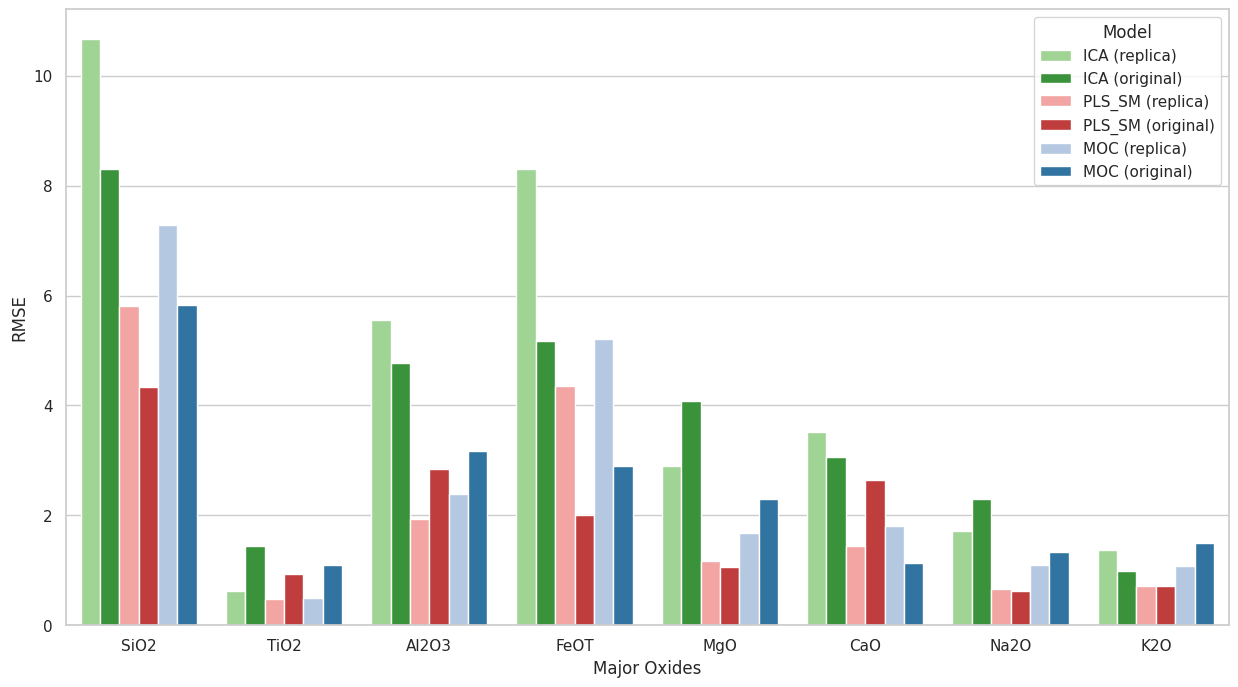

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reordering columns to alternate between replica and original
column_order = ['ICA (replica)', 'ICA (original)', 'PLS_SM (replica)', 'PLS_SM (original)', 'MOC (replica)', 'MOC (original)']
R_df = R_df[column_order]

# Melting the DataFrame
R_df_melted = R_df.reset_index().melt(id_vars='index')
R_df_melted.columns = ['Major Oxides', 'Model', 'RMSE']

# Setting Seaborn style
sns.set(style="whitegrid")

# Define a more balanced color palette
palette = {
    'MOC (original)': '#1f77b4',  # Slightly darker blue
    'ICA (original)': '#2ca02c',  # Slightly darker green
    'PLS_SM (original)': '#d62728',  # Slightly darker red
    'MOC (replica)': '#aec7e8',  # Lighter blue
    'ICA (replica)': '#98df8a',  # Lighter green
    'PLS_SM (replica)': '#ff9896'  # Lighter red
}

# Creating the plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Major Oxides', y='RMSE', hue='Model', data=R_df_melted, palette=palette)

# Adding labels and title
ax.set_xlabel('Major Oxides')
ax.set_ylabel('RMSE')
# ax.set_title('Grouped Histogram for Major Oxides')

# Adjust legend
plt.legend(title='Model')

# Display the plot
plt.show()
